# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Silva Octaviacantika
- Email: silva.octaviacantika@gmail.com
- Id Dicoding: silvaoctavia

## Menentukan Pertanyaan Bisnis

1. At what time are the most and least bicycle rentals?
2. in what season are there most bicycle rentals?
3. What is the relationship between temperature and the number of registered users?

## Menyiapkan semua library yang dibutuhkan

In [49]:
# call all the required libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px




## Data Wrangling

### Gathering Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Tabel day
day_df = pd.read_csv("/content/drive/MyDrive/BIKE/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
# Tabel hour
hour_df = pd.read_csv("/content/drive/MyDrive/BIKE/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [6]:
# check the data data type of each column contained in hour_df and day_df.
hour_df.info()
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

In [7]:
# check for missing values in the hour_df dataset
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
# missing value in the dataset day_df
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

It can be seen that there are no missing values in the hour_df and day_df dataframes

In [9]:
# check for duplication
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
print("Jumlah duplikasi: ", day_df.duplicated().sum())


Jumlah duplikasi:  0
Jumlah duplikasi:  0


When running the code above, we will see that there are no duplicate data.

In [10]:
# check the statistical parameters of the numeric column contained in day_df
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [11]:
# check the statistical parameters of the numeric column contained in hour_df
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

We will delete the instant and workingday columns. For working days, in my opinion, it is already represented by weekdays, and for instant there is no connection.
Here we will use the int data type as a category in the columns 'season', 'month', 'holiday', 'weekday', 'weathersit' because they all have data with several variants.

**Categorical data is a collection of information in the form of groups.
We will handle the dteday data type, which was previously 'object', we will change it to 'datetime'.
1. Renamed columns to make them easier to read
2. Convert the column contents so that they are easy to understand
3. Create a new column called category_days which shows the contents of the column as weekend or weekdays


#### Dropping

In [12]:
# we will delete the instant and workingday columns. For working days, in my opinion,
# it is already represented by weekdays, and for instant there is no connection
hour_df.drop(['workingday'], axis = 1, inplace= True)
day_df.drop(['workingday'], axis = 1, inplace= True)


#### Mengubah Tipe Data

##### int to category

In [13]:
# will change the int data type to category in the column 'season', 'mnth', 'holiday', 'weekday', 'weathersit'
columns = ['season', 'mnth', 'holiday', 'weekday', 'weathersit']

for column in columns:
    day_df[column] =  day_df[column].astype("category")
    hour_df[column] =  hour_df[column].astype("category")


##### object to datetime

In [14]:
# handling the previous data type dteday 'object' akan kita ubah menjadi 'datetime'
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])


#### Rename

Renamed columns to make them easier to read in the day_df dataset

In [15]:
# Renamed columns to make them easier to read in the day_df dataset
day_df.rename(columns={'yr':'year','mnth':'month','weekday':'one_of_week', 'weathersit':'weather_situation', 'windspeed':'wind_speed','cnt':'count_cr','hum':'humidity'},inplace=True)

In [16]:
# Renamed columns to make them easier to read in the hour_df dataset
hour_df.rename(columns={'yr':'year','hr':'hours','mnth':'month','weekday':'one_of_week', 'weathersit':'weather_situation','windspeed':'wind_speed','cnt':'count_cr','hum':'humidity'},inplace=True)

In [17]:
# 1. Convert column contents for easy understanding
# Season conversion to: 1:Spring, 2:Summer, 3:Fall, 4:Winter
day_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
hour_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)

# convert month to: 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
day_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
hour_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

# convert weather situation to: 1:Clear, 2:Misty, 3:Light_RainSnow 4:Heavy_RainSnow
day_df.weather_situation.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)
hour_df.weather_situation.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)

# convert one_of_week to: 0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat
day_df.one_of_week.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
hour_df.one_of_week.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

# convert year to: 0:2011, 1:2012
day_df.year.replace((0,1), ('2011','2012'), inplace=True)
hour_df.year.replace((0,1), ('2011','2012'), inplace=True)

# Calculating Humidity
day_df['humidity'] = day_df['humidity']*100
hour_df['humidity'] = hour_df['humidity']*100


Create a new column called category_days which shows the contents of the column as weekend or weekdays

In [18]:
# Create a new column called category_days which shows the contents of the column as weekend or weekdays
one_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
def get_category_days(one_of_week):
    if one_of_week in ["Saturday", "Sunday"]:
        return "weekend"
    else:
        return "weekdays"

hour_df["category_days"] = hour_df["one_of_week"].apply(get_category_days)
day_df["category_days"] = day_df["one_of_week"].apply(get_category_days)

In [19]:
def classify_humidity(humidity):
    if humidity < 45:
        return "Terlalu kering"
    elif humidity >= 45 and humidity < 65:
        return "Ideal"
    else:
        return "Terlalu Lembab"

hour_df["humidity_category"] = hour_df["humidity"].apply(classify_humidity)
day_df["humidity_category"] = day_df["humidity"].apply(classify_humidity)

can be seen,
* we have removed the instant and workingday columns ✓
* The data type in the dteday column has changed to datetime ✓
* int data type for season, month, holiday, weekday, working day, weathersit has changed to category data type ✓
* Have changed column names to make them easier to read ✓
* Already converted the contents of the column so that it is easy to understand ✓
* Have created a new column called category_days which contains weekends or weekdays ✓

## Exploratory Data Analysis (EDA)

### Explore Data hour_df


In [25]:
# view a summary of the statistical parameters of the hour_df data
hour_df.describe(include="all")

<ipython-input-25-10915b5cea00>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hour_df.describe(include="all")


,instant,dteday,season,year,month,hours,holiday,one_of_week,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr,category_days,humidity_category
count,17379.0000,17379,17379,17379,17379,17379.000000,17379.0,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379
unique,NaN,731,4,2,12,NaN,2.0,7,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3
top,NaN,2011-01-01 00:00:00,Fall,2012,May,NaN,0.0,Saturday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekdays,Terlalu Lembab
freq,NaN,24,4496,8734,1488,NaN,16879.0,2512,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12365,8356
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,0.496987,0.475775,62.722884,0.190098,35.676218,153.786869,189.463088,NaN,NaN
std,5017.0295,NaN,NaN,NaN,NaN,6.914405,NaN,NaN,NaN,0.192556,0.171850,19.292983,0.122340,49.305030,151.357286,181.387599,NaN,NaN
min,1.0000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN
25%,4345.5000,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,0.340000,0.333300,48.000000,0.104500,4.000000,34.000000,40.000000,NaN,NaN


Based on the summary of statistical parameters above, we will obtain information on the number of customers as many as 17,379. Based on the data displayed in the range between 00.00 to 23.59, the average bicycle rental occurs at 11.54 with a standard deviation of 6.91


In [44]:
# This will calculate the total count_cr for each hour in the hours column.
hour_df.groupby("hours").agg({
    "count_cr": "sum"
})


,count_cr
hours,
0,39130
1,24164
2,16352
3,8174
4,4428
5,14261
6,55132
7,154171
8,261001


Based on the pivot table above, it can be seen that the customers who have the most bicycle rentals occur at 17.00 while the fewest bicycle rentals occur at 04.00.

### Explore Data day_df


In [27]:
# view a summary of statistical parameters from day_df data
day_df.describe(include="all")


<ipython-input-27-322f4943464e>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,instant,dteday,season,year,month,holiday,one_of_week,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr,category_days,humidity_category
count,731.000000,731,731,731,731,731.0,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731,731
unique,NaN,731,4,2,12,2.0,7,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3
top,NaN,2011-01-01 00:00:00,Fall,2012,Jan,0.0,Sunday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekdays,Ideal
freq,NaN,1,188,366,62,710.0,105,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,521,334
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,62.789406,0.190486,848.176471,3656.172367,4504.348837,NaN,NaN
std,211.165812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.183051,0.162961,14.242910,0.077498,686.622488,1560.256377,1937.211452,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN,NaN
25%,183.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,52.000000,0.134950,315.500000,2497.000000,3152.000000,NaN,NaN


Based on the summary of statistical parameters above, we will obtain information on the number of subscribers as many as 17379 people in seasons 1 - 4 having the top

In [28]:
# see the number of rentals each season
day_df.groupby(by="season").count_cr.sum().sort_values(ascending=False).reset_index().head(10)

,season,count_cr
0,Fall,1061129
1,Summer,918589
2,Winter,841613
3,Spring,471348


Based on these results, it is known that the fall and summer seasons are the two seasons with the largest numbers.


In [47]:
## see the number of rentals each year based on registered and casual
day_df.groupby("year").agg({
    "registered": "sum",
    "casual": "sum"
})


,registered,casual
year,,
2011,995851,247252
2012,1676811,372765


Based on the picture above, someone who is already a member and who is not yet a member has quite a different value, someone who already has members in 2011 is 995851 while those who are not yet members are 247252

It can be seen from the picture above that red dates have fewer bicycle rental enthusiasts than normal dates.

## Visualization & Explanatory Analysis

1. what times are the most and least rented?
2. In what season are there most bicycle rentals?
3. What is the relationship between temperature and the number of registered users?

### 1: what time of day are most and least rented? ✓

In [30]:
# grouping hours and count_cr
sum_order_items_df = hour_df.groupby("hours").count_cr.sum().sort_values(ascending=False).reset_index()


<ipython-input-65-531e3508bf2b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-65-531e3508bf2b>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


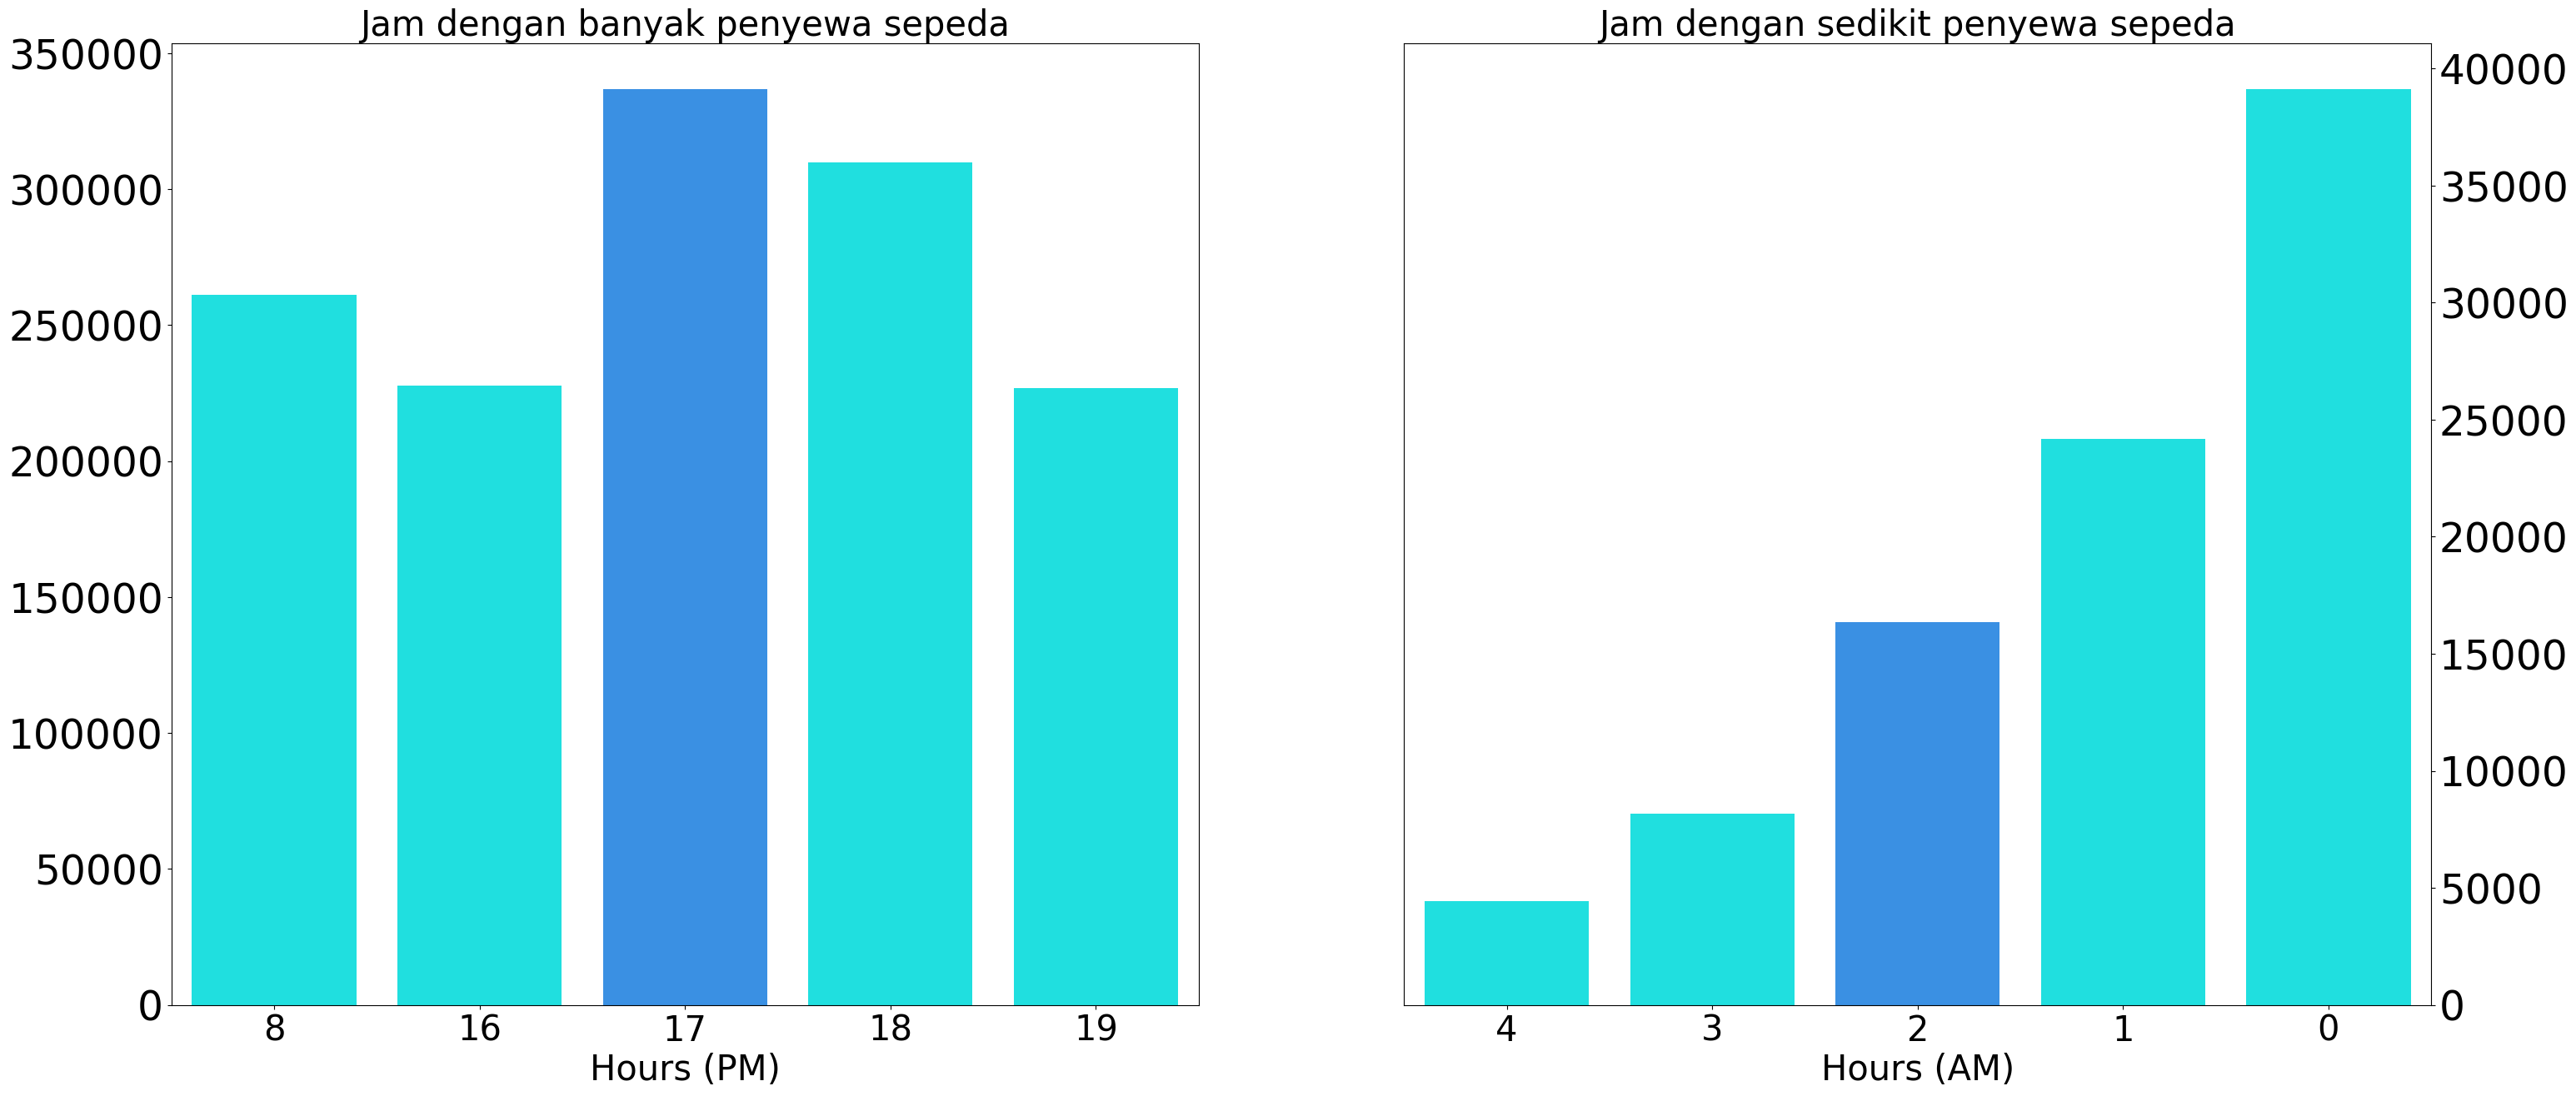

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Buat subplot dengan 1 baris dan 2 kolom, dengan ukuran (35, 15)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(35, 15))

# Buat barplot untuk melihat perbedaan dalam penyewaan sepeda berdasarkan jam
sns.barplot(
    x="hours",
    y="count_cr",
    data=sum_order_items_df.head(5),
    palette=["#00FFFF", "#00FFFF", "#1E90FF", "#00FFFF", "#00FFFF"],
    ax=ax[0]
)

# Atur label dan judul untuk subplot pertama
ax[0].set_ylabel(None)
ax[0].set_xlabel("Hours (PM)", fontsize=30)
ax[0].set_title("Jam dengan banyak penyewa sepeda", loc="center", fontsize=30)
ax[0].tick_params(axis='y', labelsize=35)
ax[0].tick_params(axis='x', labelsize=30)

# Buat barplot untuk jam dengan sedikit penyewa sepeda
sns.barplot(
    x="hours",
    y="count_cr",
    data=sum_order_items_df.sort_values(by="hours", ascending=True).head(5),
    palette=["#00FFFF", "#00FFFF", "#1E90FF", "#00FFFF", "#00FFFF"],
    ax=ax[1]
)

# Atur label dan judul untuk subplot kedua
ax[1].set_ylabel(None)
ax[1].set_xlabel("Hours (AM)", fontsize=30)
ax[1].set_title("Jam dengan sedikit penyewa sepeda", loc="center", fontsize=30)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].tick_params(axis='y', labelsize=35)
ax[1].tick_params(axis='x', labelsize=30)

# Tampilkan plot
plt.show()


Based on the image above, you can see that bicycle rentals are most used at 17:00, around 336860 rentals. In contrast to this, rentals at 04:00 were the least sold product with around 4428 rentals.

### 2: in what season are there most bicycle rentals?

<ipython-input-66-85f5164fe83b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-66-85f5164fe83b>:8: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(


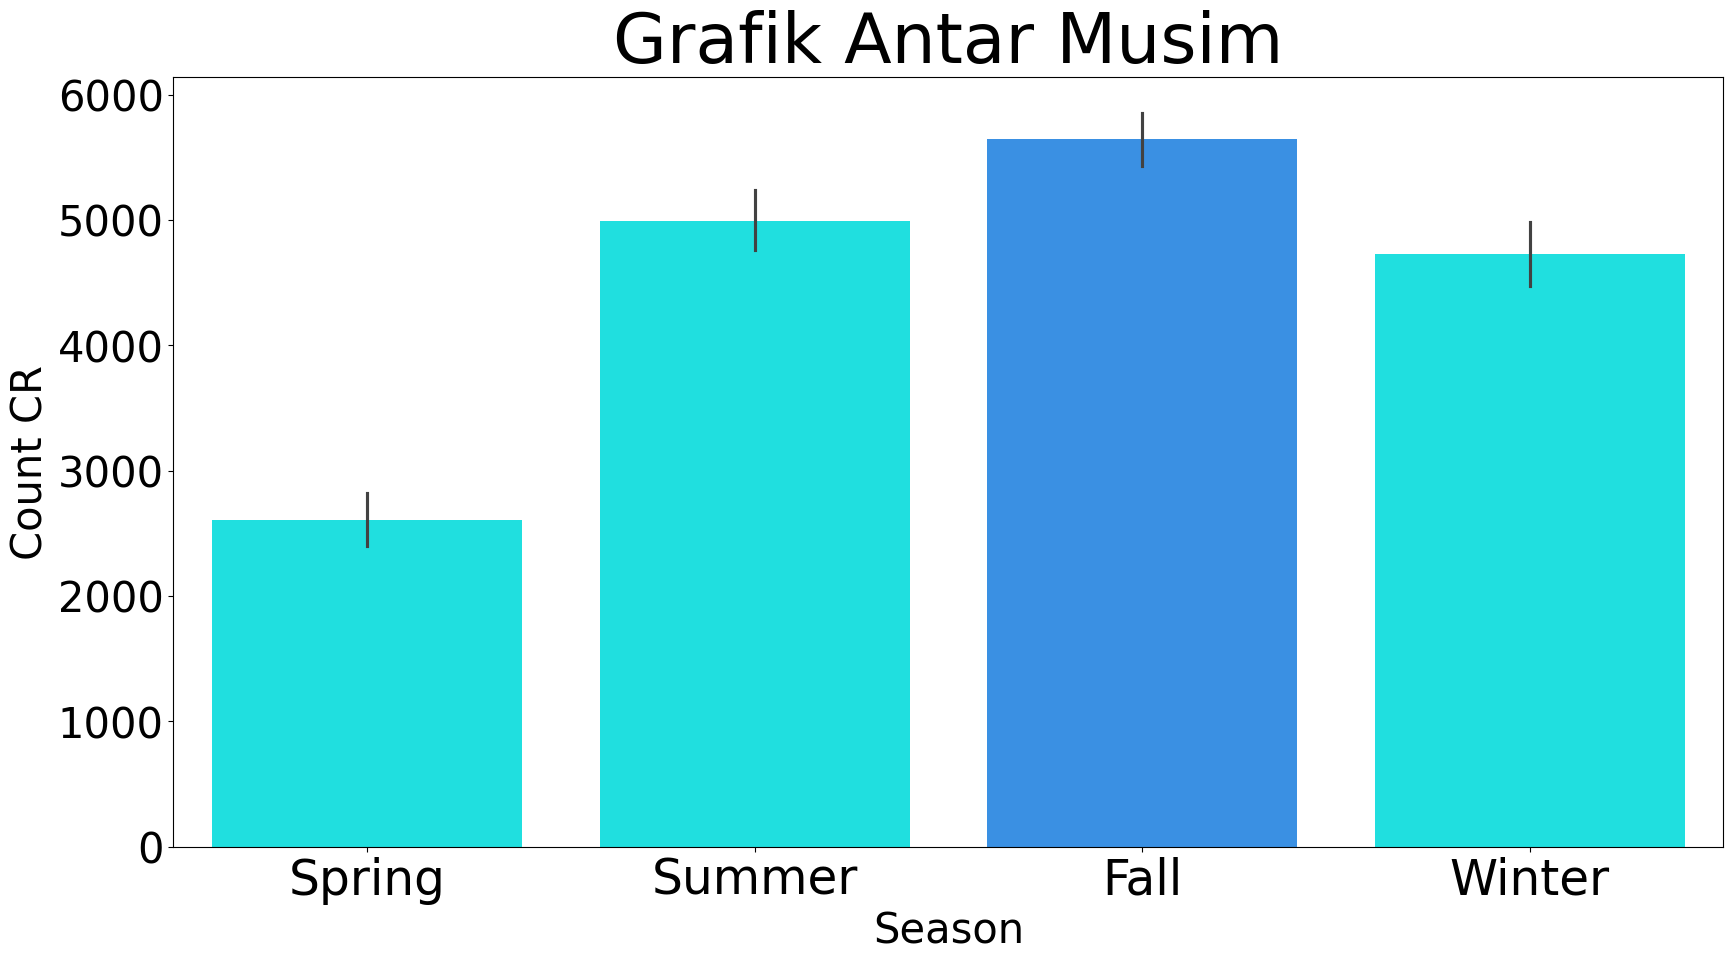

In [66]:
# Definisikan warna untuk setiap musim
colors = ["#00FFFF", "#00FFFF", "#1E90FF", "#00FFFF", "#00FFFF"]

# Buat subplot dengan ukuran 20x10
fig, ax = plt.subplots(figsize=(20, 10))

# Buat barplot untuk y="count_cr" dan x="season" dengan menggunakan data=day_df
sns.barplot(
    y="count_cr",
    x="season",
    data=day_df.sort_values(by="season", ascending=False),
    palette=colors,
    ax=ax
)

# Set judul, label sumbu y dan x, serta parameter tick untuk subplot
ax.set_title("Grafik Antar Musim", loc="center", fontsize=50)
ax.set_ylabel("Count CR", fontsize=30)
ax.set_xlabel("Season", fontsize=30)
ax.tick_params(axis='x', labelsize=35)
ax.tick_params(axis='y', labelsize=30)

# Tampilkan plot
plt.show()


The season with the most rentals is the Fall season with a total of 1061129 rentals in the fall.

### 3: What is the relationship between temperature and the number of registered users?

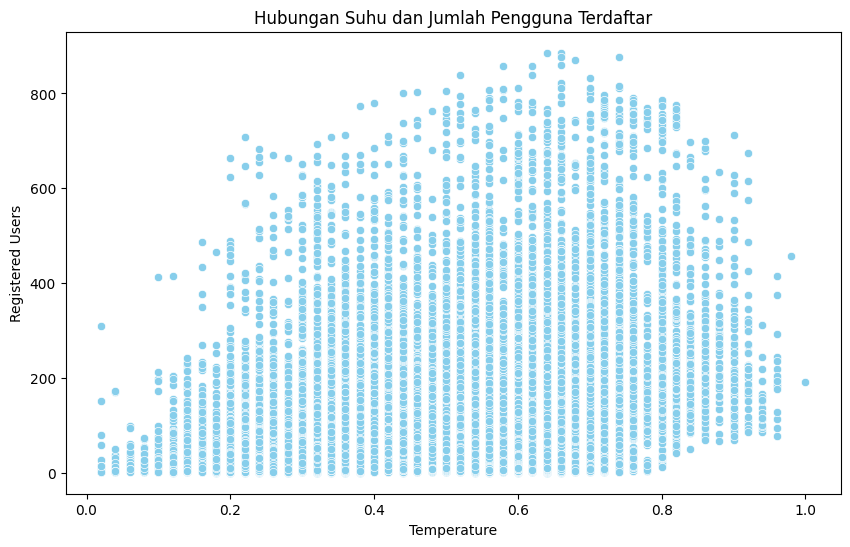

In [58]:
# Buat scatter plot untuk y="registered" dan x="temp" dengan menggunakan data=hour_df
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='registered', data=hour_df, color='skyblue')
plt.title('Hubungan Suhu dan Jumlah Pengguna Terdaftar')
plt.xlabel('Temperature')
plt.ylabel('Registered Users')
plt.show()



The plot indicates a positive correlation, suggesting that as the temperature increases, the number of registered users also tends to increase.

## Conclusion

Question:<br>
     1. at what time are the most and least bicycle rentals? <br>
     2. in what season are there most bicycle rentals? <br>
     3. What is the relationship between temperature and the number of registered users? <br>

- Conclusion question 1: Based on the image above, you can see that bicycle rentals are most frequently used at 17:00. In contrast, 04:00 rentals are the least sold product.

- conclusion question 2: During the autumn season.
- conclusion question 3:
The graph demonstrates a positive relationship, indicating that higher temperatures correspond to an increase in the number of registered users.

## Menerapkan teknik analisis lanjutan

### 1. Analisis Clustering

Clustering is a data analysis method for grouping data or objects based on similar characteristics without requiring prior labels. In the context of bicycle management, clustering analysis can be used to identify groups of users who tend to rent bicycles on sunny days.

#### Total Users Based on weather situation

In [41]:
hour_df.groupby("weather_situation")["count_cr"].nunique().sort_values(ascending=False)


weather_situation
Clear             848
Misty             649
Light_rainsnow    368
Heavy_rainsnow      3
Name: count_cr, dtype: int64

we can identify groups of users who are more likely to rent bicycles on clear days

### Total Users Based on Humidity

In [40]:
hour_df.groupby(by="humidity_category").agg({
    "count_cr": "count"
})


,count_cr
humidity_category,
Ideal,5505
Terlalu Lembab,8356
Terlalu kering,3518


we can identify groups of users who are more likely to rent a bicycle in too humid humidity

### 2. RFM Analysis

The RFM Analysis below is used to understand customer behavior from three main factors:
* Recency (how recently the customer interacted with the business)
* Frequency (number of customers interacting)
* Monetary (the amount of money they use)

In [39]:
current_date = max(hour_df['dteday'])
rfm_df = hour_df.groupby('registered').agg({
    'dteday': lambda x: (current_date - x.max()).days,  # Recency
    'instant': 'count',  # Frequency
    'count_cr': 'sum'  # Monetary
}).reset_index()

rfm_df.columns = ['registered', 'Recency', 'Frequency', 'Monetary'] # Rename columns

print(rfm_df.head())


   registered  Recency  Frequency  Monetary
0           0       38         24        35
1           1        0        201       294
2           2        1        245       648
3           3        0        294      1154
4           4        3        307      1602
